# Homework 0

**Name:** Andrea Gonzalez Cruz

**e-mail:** andrea.gcruz@alumnos.udg.mx

# Modules

In [1]:
# Load modules 
import matplotlib.pyplot as plt # Matplotlib is a library for creating interactive visualization
import numpy as np # Numpy is a mathematical library for Python

# Theory on the Gradient Descent algorithm

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function, taking repeated steps in the opposite direction of the gradient of the function at the current point. 
Formally, if we start at a point X0 and move a positive distance (α) in the direction of the negative gradient, our new and improved X1 will be: 



By repeating this process, the algorithm gradually converges towards the optimal parameter values that minimize the cost. 

### The Learning Rate
The learning rate (α) has a crucial in determinate how quickly the algorithm converges to the minimum of the cost function. It controls the step size taken in each iteration of the process.
When the learning rate is too small, the algorithm takes tiny steps towards the minimum of the cost function (making the convergence process extremely slow). Also, if the learning rate is too large, gradient descent can overshoot the minimum and fail to converge.

### Rosenbrock Function
In this study case, I'm going to use the Rosenbrock function. In mathematical optimization, this is a non-convex function used as a performance test problem.
This function is known for its global minimum at point (1,1).

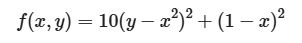

In [79]:
# Function to be optimized (Rosenbrock Function)
def f_rosen(x, y):
    return (1-x)**2 + 100*(y-x**2)**2 #Define the Rosenbrock Function
    
def gradient(x, y): 
    dfdx= -2*(1-x) - 400*x*(y-x**2) #Derivative function for df/dx
    dfdy= 200*(y-x**2) #Derivative function for df/dy 
    return np.array([dfdx, dfdy])

In [92]:
#Create the Gradient Descent algorithm
#max_iter refers to the number of iterations in the algorithm
def gradient_descent(learning_rate=0.001, max_iter=1000, tol=1e-6, start_point=np.array([0.0, 0.0])):
    point = start_point
    path = [point]

    #Define the max number of iterations
    for i in range(max_iter):
        grad = gradient(point[0], point[1])
        new_point = point - learning_rate * grad
        path.append(new_point)
        
        if np.linalg.norm(grad) < tol: #If the magnitude is small, the sentence ends here
            break
        point = new_point
    
    return np.array(path), point

#Define the learning rate, number of iterations and values for initial points
#When processing the Rosenbrock function, a small learning rate is needed to avoid errors
learning_rate = 0.001
start_point = np.array([-1, 1])

In [93]:
#Run the Gradient Descent algorithm
path, minimum = gradient_descent(learning_rate=learning_rate, start_point=start_point)

#Minimum point in the function
print(f"Minimum value of the function: {minimum}")
print(f"Value: {f_rosen(minimum[0], minimum[1])}")

Minimum value of the function: [0.36363988 0.12919881]
Value: 0.40587541600795535


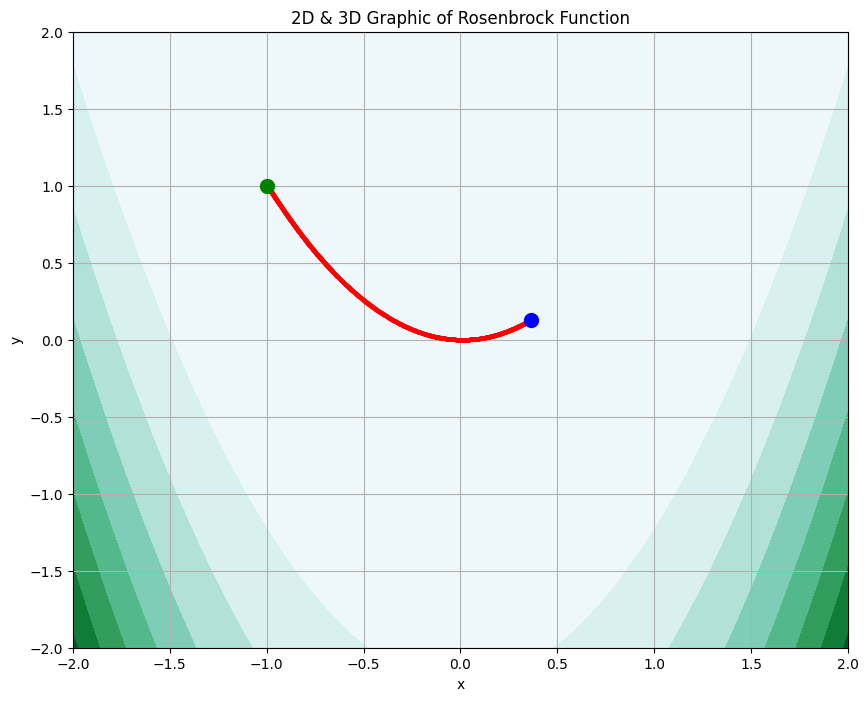

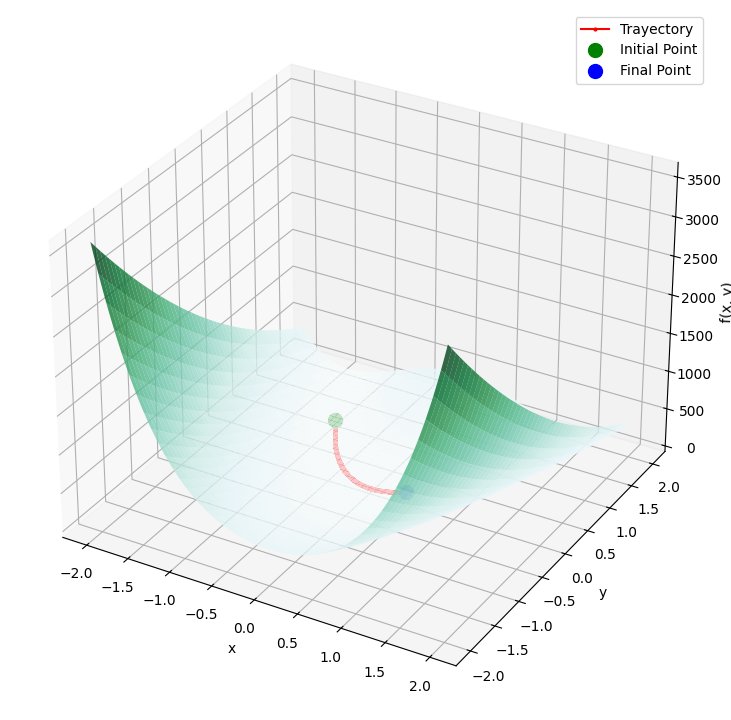

In [96]:
# Plot the results

#Meshgird to evaluate the Rosenbrock Function
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f_rosen(X, Y)

#Desing of the 2D Graphic
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.contourf(X, Y, Z, cmap='BuGn')
ax.plot(path[:, 0], path[:, 1], 'ro', markersize=2, label='Trayectory') #Define the path
ax.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Initial Point') #Define the initial point
ax.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Final Point') #Define the final point
ax.set_xlabel('x')
ax.set_ylabel('y')

#Desing of the 3D Graphic
fig = plt.figure(figsize = (20,20))
ax2 = fig.add_subplot(2, 2, 2, projection = '3d')
ax2.grid()
ax2.plot_surface(X, Y, Z, cmap='BuGn', alpha=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.plot(path[:, 0], path[:, 1], color='r', marker='o', markersize=2, label='Trayectory') #Define the path
ax2.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Initial Point') #Define the initial point
ax2.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Final Point') #Define the final point

ax.set_title('2D & 3D Graphic of Rosenbrock Function')
plt.legend()
plt.show()